<a href="https://colab.research.google.com/github/jcmachicao/ModCpx/blob/main/ModCplx__MonteCarloBolsaValores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Montecarlo para Valores en Bolsa

In [ ]:
#@title Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


* Una de las características a observar es la comparación entre empresas de la industria de la salud con las empresas de energía.
* Otra comparación interesante es entre el año 2009 y 2019, por ejemplo, o 2020.

In [ ]:
datos = pd.DataFrame()
info_symbols = ['VRTX', 'GOOG', 'AZN', 'XOM', 'SLB']
info_symbol = info_symbols[1]
start_date, end_date = '2020-01-01', '2020-08-30'
datos['prueba'] = wb.DataReader(info_symbol, data_source='yahoo', start=start_date)['Adj Close']

In [ ]:
datos.tail()

,prueba
Date,
2020-09-14,1519.280029
2020-09-15,1541.439941
2020-09-16,1520.900024
2020-09-17,1495.530029
2020-09-18,1459.989990


In [ ]:
#parametros
cont = 0
n_interv = 365 # cuántas curvas se van a generar
n_iter = 200 # cuántas veces se va a iterar para ajustar valores

In [ ]:
#@title Modelamiento
#modelo estadístico
logs = np.log(1.000001 + datos.pct_change())
log_u, log_var = logs.mean(), logs.var()
# log_u, log_var
drift, desv = log_u - (0.5 * log_var), logs.std()
# drift, desv

d_ret = np.exp(drift.values + desv.values * norm.ppf(np.random.rand(n_interv, n_iter)))
cont += 1
#d_ret
S0 = datos.iloc[-1]
#S0
price_list = np.zeros_like(d_ret)
price_list[0] = S0
#price_list

#generación de curvas
for t in range(1, n_interv):
    price_list[t] = price_list[t - 1] * d_ret[t]
plots = price_list.T

In [ ]:
plots.shape

(200, 365)

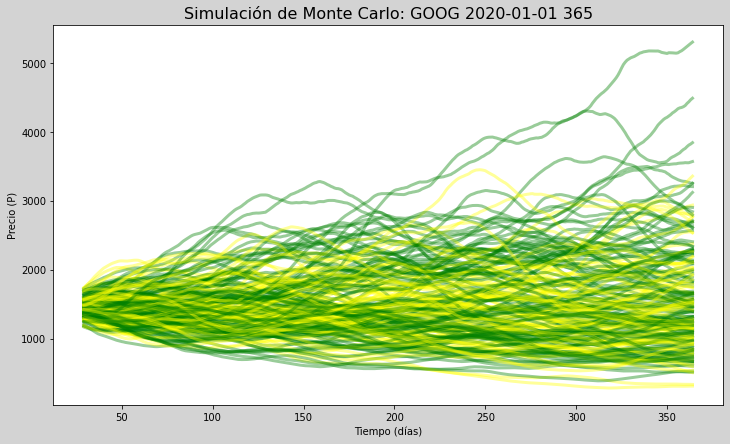

In [ ]:
#@title Gráfica
plt.figure(figsize=(12,7), facecolor='lightgray')
for i in range(n_iter):
    if i%5 > 2:
        cx = 'yellow'
    else:
        cx = 'green'
    #print(cx)
    #plt.scatter(np.arange(len(plots[i])), plots[i], marker='H', lw=0, s=200, alpha=0.2, color=cx)
    plt.plot(np.arange(len(plots[i])), pd.Series(plots[i]).rolling(30).mean(), '-', lw=3, alpha=0.4, color=cx)
plt.title('Simulación de Monte Carlo: ' + str(info_symbol) + ' ' + str(start_date) + ' ' + str(n_interv), fontsize=16)
plt.ylabel('Precio (P)')
plt.xlabel('Tiempo (días)')
#plt.savefig('tempplot' + str(n_iter) + '_' + str(cont) + '.png')
plt.show()

https://codeyogi.co.uk/2019/12/17/monte-carlo-stocks/

https://www.freecodecamp.org/news/creating-your-first-image-classifier/